# Ludwig test
## Installing virtualenv and ludwig on Ubuntu 18.04

``` bash
# Start from the text_classification directory
cd text_classification

# Get pip and virtualenv
sudo apt-get install python3-pip
pip3 install virtualenv

# Now set up a new virtualenv with a new python
virtualenv -p python3 venv
# Activate the venv
. venv/bin/activate
# Note, to deactivate the venv, just run "deactivate"

#Library prereq for ludwig 2
sudo apt-get install libgmp3-dev
sudo apt-get install libsndfile1

# Now install packages and ludwig 0.2.2.8 (0.3 is buggy)
# Assume running from eda directory
pip install -r ../requirements.txt
pip install ludwig==0.2.2.8
pip install ludwig[viz]==0.2.2.8

# Other missing dependencies
pip install imblearn matplotlib

# Get Jupyter (to run this file)
pip install jupyter

```


## Key Imports

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os
import dill as pickle
import re
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pull in the Labeled Data

Let's pull in the labeled data from the pkl file.

In [4]:
attachments = pickle.load(open('../utils/binaries/train.pkl','rb'))
len(attachments)

993

In [9]:
import pprint
pprint.pprint(attachments[0].keys())

dict_keys(['text', 'target'])


In [10]:
# We read the text and insert it into a pandas dataframe. Sklearn uses dataframes
# because it is a table class with nice analysis methods
labeled_data = pd.DataFrame(attachments)

# Display the first 6 rows to show that we successfully read it
labeled_data.head(6)

,text,target
0,statement work local commerci commun servic ge...,0
1,combin commerci item accord format far subpart...,0
2,amend contract amend modif effect date contrac...,0
3,perform work statement electron document manag...,0
4,statement background center devic radiolog hea...,1
5,html public xhtml statement work technic suppo...,1


### Save as a CSV

In [13]:
# Remove any old training set data
! rm -f training_set.hdf5 training_set.json

# Now save the data as a csv file
labeled_data.to_csv("training_set.csv", index=False)
! head training_set.csv

text,target
statement work local commerci commun servic gener statement work comprehens descript local exchang access analog digit access transport access transport area interconnect function air forc requir contractor technic capabl provid servic accord specif servic requir current author identifi appendix time potenti vendor solicit specif contractor shall provid transmiss test design layout need perform provid local access transport servic function design demarc servic shall includ special wire infrastructur ensur propos solut compat current contractor respons troubleshoot maintain oper circuit termin access local exchang shall oper directori assist emerg servic servic shall includ servic entiti govern long distanc servic site current provid feder technolog servic contract author contractor shall follow feder commun commiss public util commiss depart defens air forc industri standard air forc recruit smaller applic servic requir particularli site base telephon switch subject standar

perform work statement electron document manag system tabl content background acronym list task order object refer task requir deliver servic summari govern furnish properti data travel secur instruct transit plan administr consider contract develop document manag system provid solut implement current edm file longer read sinc previou contract end requir softwar acronym list air forc contract offic cor contract offic repres commun squadron dod depart defens edm electron document manag system fouo offici use gfe govern furnish equip gfp govern furnish properti program manag pw perform work statement secretari air forc financi manag budget sap softwar assur plan task order task order ongo effort streamlin busi improv inform speed access histor requir implement document manag system sharepoint anoth wide use electron document manag system provid follow document record manag electron retriev histor refer afi industri secur program manag shall task contract provid electron document manag sy

html public xhtml coast guard band equip statement work juli purpos contract obtain band termin equip coast guard equip use part band maritim data commun band equip shall complet year warranti materi contractor shall provid repair return coast guard requir near global underway connect architectur enabl cutter connect back coast guard one net last year coast guard use nera commun system hardwar spawar pmw program commerci satellit servic provid underway coast guard replac system fleet broadband bgan coast guard intend add band system cutter fleet use primari connect fleet broadband use secondari commun system connect cgone case band coverag environment coast guard conduct two success maritim prototyp base idirect equival teleport cutter architectur contractor project contractor shall provid project manag shall respons contractor work perform project manag design key govern paragraph project manag shall singl point contact contract offic contract technic repres project manag shall one se

## Use Ludwig to Train a Model

In [19]:
!date
!rm -Rf results # Removes past runs
!ludwig experiment \
--data_csv training_set.csv \
--model_definition_file model_definition.yaml \
--output_directory ./results
!date


Tue Oct 20 20:25:42 EDT 2020
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.2.2.8 - Experiment

Experiment name: experiment
Model name: run
Output path: ./results/experiment_run


ludwig_version: '0.2.2.8'
command: ('/home/butch/srt-fbo-scraper/eda/venv/bin/ludwig experiment --data_csv '
 'training_set.csv --model_definition_file model_definition.yaml '
 '--output_directory ./results')
commit_hash: '8130d5d0bc96'
random_seed: 42
input_data: 'training_set.csv'
model_definition: {   'combiner': {'type'

Writing dataset
Writing train set metadata with vocabulary
Training set: 707
Validation set: 89
Test set: 197

╒══════════╕
│ TRAINING │
╘══════════╛

2020-10-20 20:25:59.921030: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-10-20 20:25:59.940612: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 3801000000 Hz
2020-10-20 20:25:59.940833: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x48dc560 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-10-20 20:25:59.940860: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

Epoch   1
Evaluation test : 100%|███████████████████████████| 2/2 [00:00<00:00,  3.16it/s]
Took 13.4472s
╒══════════╤════════╤════════════╤═════════════╕
│ target   │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════



Epoch  10
Evaluation test : 100%|███████████████████████████| 2/2 [00:00<00:00,  3.14it/s]
Took 12.9816s
╒══════════╤════════╤════════════╤═════════════╕
│ target   │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.0855 │     0.9915 │      1.0000 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 0.4955 │     0.8539 │      1.0000 │
├──────────┼────────┼────────────┼─────────────┤
│ test     │ 0.5317 │     0.7563 │      1.0000 │
╘══════════╧════════╧════════════╧═════════════╛
Last improvement of loss on combined happened 3 epochs ago


Epoch  11
Evaluation test : 100%|███████████████████████████| 2/2 [00:00<00:00,  3.13it/s]
Took 11.9866s
╒══════════╤════════╤════════════╤═════════════╕
│ target   │   loss │   accuracy │   hits_at_k │
╞══════════╪════════╪════════════╪═════════════╡
│ training │ 0.0566 │     0.9873 │      1.0000 │
├──────────┼────────┼────────────┼─────────────┤
│ vali     │ 0.4593 │     0.7978 │      1

Finished: experiment_run
Saved to: ./results/experiment_run
Tue Oct 20 20:29:35 EDT 2020


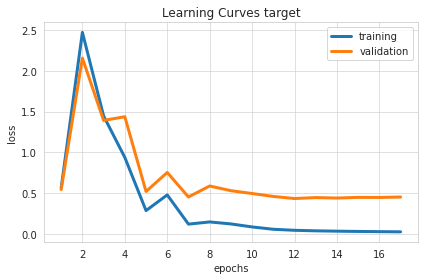

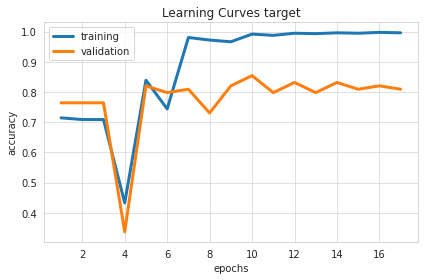

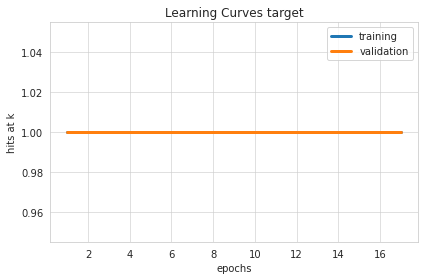

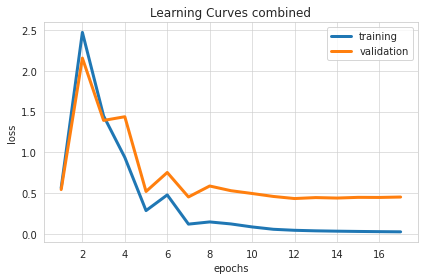

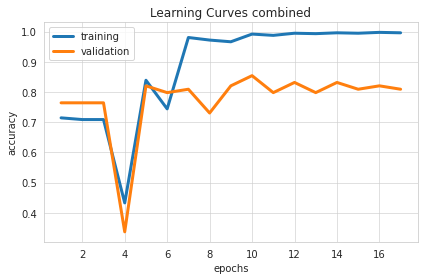

In [20]:
# Run visualize
# The following would create pdfs of the visualization
# !ludwig visualize -v learning_curves -trs results/experiment_run_0/training_statistics.json -tes results/experiment_run_0/test_statistics.json -od .

from ludwig import visualize
import json

with open('./results/experiment_run/training_statistics.json') as f:
    data = json.load(f)
 
visualize.learning_curves(data, None)


In [21]:
# Load a pretrained model
from ludwig.api import LudwigModel

model = LudwigModel.load('./results/experiment_run/model')

model.predict(pd.DataFrame({"text":["Do you think this needs section 508 compliance?"]}))



INFO:tensorflow:Restoring parameters from ./results/experiment_run/model/model_weights


INFO:tensorflow:Restoring parameters from ./results/experiment_run/model/model_weights


,target_predictions,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1,target_probability
0,0,5.349272e-10,0.878857,0.121143,0.878857


In [22]:
# Directly from MD
model.predict(pd.DataFrame({"text":["Please use an HTML page and web site for this project."]}))


,target_predictions,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1,target_probability
0,0,3.028966e-13,0.968654,0.031346,0.968654


In [23]:
model.predict(pd.DataFrame({"text":["The Air forc wants this application"]}))


,target_predictions,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1,target_probability
0,0,1.784924e-09,0.987623,0.012377,0.987623


In [24]:
model.predict(pd.DataFrame({"text":["Is this sentence more like Shakespeare or like Moby Dick?"]}))


,target_predictions,target_probabilities_<UNK>,target_probabilities_0,target_probabilities_1,target_probability
0,0,1.170331e-10,0.976653,0.023347,0.976653
